In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data cleaning and feature engineering

In [3]:
nfl_stadiums_df = pd.read_csv('./archive/nfl_stadiums.csv', encoding= 'unicode_escape')
nfl_stadiums_df.head(10)


,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,NaN,NaN,NaN
1,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,dome,65000,Grass,NaN,NaN,NaN,NaN,NaN
2,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alumni Stadium,"Chestnut Hill, MA",NaN,NaN,outdoor,"Perimeter Rd, Chestnut Hill, MA 02467",2467,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN
4,Anaheim Stadium,"Anaheim, CA",1980.0,1994.0,outdoor,"2000 E Gene Autry Way, Anaheim, CA 92806",92806,warm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arrowhead Stadium,"Kansas City, MO",1972.0,NaN,outdoor,"1 Arrowhead Dr, Kansas City, MO 64129",64129,cold,"76,416",Grass,US1MOJC0028,"KANSAS CITY 5.1 SE, MO US",39.0692,-94.4871,264.9
6,AT&T Stadium,"Arlington, TX",2009.0,NaN,retractable,"1 AT&T Way, Arlington, TX 76011",76011,dome,"80,000",FieldTurf,USC00410337,"ARLINGTON SIX FLAGS, TX US",32.7572,-97.0736,163.4
7,Atlanta-Fulton County Stadium,"Atlanta, GA",1966.0,1991.0,outdoor,"521 Capitol Avenue SE, Atlanta, Georgia 30312",30312,warm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Balboa Stadium,"San Diego, CA",NaN,NaN,outdoor,"Balboa Stadium, San Diego, CA 92101",92101,warm,NaN,Grass,NaN,NaN,NaN,NaN,NaN
9,Bank of America Stadium,"Charlotte, NC",1996.0,2016.0,outdoor,"800 S Mint St, Charlotte, NC 28202",28202,moderate,"73,778",Grass,USW00013881,"CHARLOTTE DOUGLAS AIRPORT, NC US",35.2236,-80.9552,221.9


In [4]:
nfl_teams = pd.read_csv('./archive/nfl_teams.csv')
nfl_teams.head(10)


,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


In [5]:
spreads_and_scores_df = pd.read_csv('./archive/spreadspoke_scores.csv')
spreads_and_scores_df.tail()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN
13230,1/30/2022,2021,Conference,True,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,46.0,SoFi Stadium,False,72.0,0.0,NaN,DOME
13231,2/13/2022,2021,Superbowl,True,Los Angeles Rams,NaN,NaN,Cincinnati Bengals,LAR,-4.0,48.5,SoFi Stadium,True,72.0,0.0,NaN,DOME


In [6]:
# remove nulls and do some data cleaning
spreads_and_scores_df = spreads_and_scores_df.replace(r'^\s*$', np.nan, regex=True)
spreads_and_scores_df = spreads_and_scores_df[(spreads_and_scores_df.score_home.isnull() == False)&(spreads_and_scores_df.team_favorite_id.isnull() == False)&(spreads_and_scores_df.over_under_line.isnull() == False)&(spreads_and_scores_df.schedule_season >= 1980)]
spreads_and_scores_df.reset_index(drop=True, inplace=True)


In [7]:
spreads_and_scores_df.loc[(spreads_and_scores_df.schedule_week == '18'), 'schedule_week'] = '17'
spreads_and_scores_df.loc[(spreads_and_scores_df.schedule_week == 'Wildcard') | (spreads_and_scores_df.schedule_week == 'WildCard'), 'schedule_week'] = '18'
spreads_and_scores_df.loc[(spreads_and_scores_df.schedule_week == 'Division'), 'schedule_week'] = '19'
spreads_and_scores_df.loc[(spreads_and_scores_df.schedule_week == 'Conference'), 'schedule_week'] = '20'
spreads_and_scores_df.loc[(spreads_and_scores_df.schedule_week == 'Superbowl') | (spreads_and_scores_df.schedule_week == 'SuperBowl'), 'schedule_week'] = '21'


In [8]:
spreads_and_scores_df['team_home'] = spreads_and_scores_df.team_home.map(nfl_teams.set_index('team_name')['team_id'].to_dict())
spreads_and_scores_df['team_away'] = spreads_and_scores_df.team_away.map(nfl_teams.set_index('team_name')['team_id'].to_dict())
spreads_and_scores_df['over_under_line'] = spreads_and_scores_df.over_under_line.astype(float)
spreads_and_scores_df['schedule_week'] = spreads_and_scores_df.schedule_week.astype(int)

In [9]:
# one hot enconding of favored team for each game
spreads_and_scores_df["team_favorite_away"] = (spreads_and_scores_df["team_favorite_id"] == spreads_and_scores_df["team_away"]).astype(int)
spreads_and_scores_df["team_favorite_home"] = (spreads_and_scores_df["team_favorite_id"] == spreads_and_scores_df["team_home"]).astype(int)
spreads_and_scores_df["schedule_playoff"] = spreads_and_scores_df["schedule_playoff"].astype(int)
spreads_and_scores_df["stadium_neutral"] = spreads_and_scores_df["stadium_neutral"].astype(int)


In [10]:
# add columns to represent real results for each game
spreads_and_scores_df['total_score'] = spreads_and_scores_df.score_home + spreads_and_scores_df.score_away
spreads_and_scores_df['did_home_team_win'] = (spreads_and_scores_df.score_home > spreads_and_scores_df.score_away).astype(int)
spreads_and_scores_df.tail()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_favorite_away,team_favorite_home,total_score,did_home_team_win
10438,1/22/2022,2021,19,1,TEN,16.0,19.0,CIN,TEN,-4.0,...,Nissan Stadium,0,35.0,0.0,43.0,NaN,0,1,35.0,0
10439,1/23/2022,2021,19,1,KC,42.0,36.0,BUF,KC,-2.5,...,Arrowhead Stadium,0,35.0,6.0,54.0,NaN,0,1,78.0,1
10440,1/23/2022,2021,19,1,TB,27.0,30.0,LAR,TB,-3.0,...,Raymond James Stadium,0,50.0,11.0,69.0,NaN,0,1,57.0,0
10441,1/30/2022,2021,20,1,KC,24.0,27.0,CIN,KC,-7.0,...,Arrowhead Stadium,0,41.0,4.0,41.0,NaN,0,1,51.0,0
10442,1/30/2022,2021,20,1,LAR,20.0,17.0,SF,LAR,-3.5,...,SoFi Stadium,0,72.0,0.0,NaN,DOME,0,1,37.0,1


In [11]:
# use data on seasons from 1980 and beyond
spreads_and_scores_df.schedule_season = spreads_and_scores_df.schedule_season - 1980
spreads_and_scores_df = spreads_and_scores_df.drop(["score_away","score_home","team_favorite_id","schedule_date","stadium_neutral","weather_detail"],axis = 1)
spreads_and_scores_df = spreads_and_scores_df.fillna(0)
spreads_and_scores_df["stadium"]=pd.factorize(spreads_and_scores_df.stadium)[0]
spreads_and_scores_df["team_away"]=pd.factorize(spreads_and_scores_df.team_away)[0]
spreads_and_scores_df["team_home"]=pd.factorize(spreads_and_scores_df.team_home)[0]
spreads_and_scores_df['weather_humidity'] = pd.to_numeric(spreads_and_scores_df['weather_humidity'])
spreads_and_scores_df.to_csv('spreads_and_scores_clean.csv', index=False)
spreads_and_scores_df

,schedule_season,schedule_week,schedule_playoff,team_home,team_away,spread_favorite,over_under_line,stadium,weather_temperature,weather_wind_mph,weather_humidity,team_favorite_away,team_favorite_home,total_score,did_home_team_win
0,0,1,0,0,0,-3.0,35.0,0,64.0,8.0,66.0,1,0,24.0,1
1,0,1,0,1,1,-1.0,34.0,1,72.0,9.0,81.0,1,0,29.0,0
2,0,1,0,2,2,-6.0,35.0,2,65.0,5.0,77.0,1,0,18.0,1
3,0,1,0,3,3,-3.0,42.0,3,82.0,10.0,58.0,0,1,41.0,0
4,0,1,0,4,4,-9.0,38.0,4,66.0,11.0,70.0,0,1,61.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,41,19,1,26,19,-4.0,48.5,51,35.0,0.0,43.0,0,1,35.0,0
10439,41,19,1,3,26,-2.5,54.0,3,35.0,6.0,54.0,0,1,78.0,1
10440,41,19,1,14,14,-3.0,48.0,48,50.0,11.0,69.0,0,1,57.0,0
10441,41,20,1,3,19,-7.0,54.5,3,41.0,4.0,41.0,0,1,51.0,0


In [ ]:
spreads_and_scores_df.corr()['total_score']

schedule_season        0.125905
schedule_week          0.012743
schedule_playoff       0.033223
team_home             -0.004434
team_away              0.021546
spread_favorite       -0.015909
over_under_line        0.300795
stadium                0.086212
weather_temperature    0.005389
weather_wind_mph      -0.138684
weather_humidity      -0.116725
team_favorite_away     0.006649
team_favorite_home    -0.000856
total_score            1.000000
did_home_team_win     -0.003384
Name: total_score, dtype: float64

## Prediction with Linear Regression
We will predict the real score of a game, using the **total_score** column as the label value. 

In [ ]:
# drop the labels column and the column that holds data derived from the dataset
# drop the labels that have small correlation as well
linear_reg_features = spreads_and_scores_df.drop(['total_score', 'did_home_team_win', 'schedule_week'], axis=1)
linear_reg_features.head()

,schedule_season,schedule_playoff,team_home,team_away,spread_favorite,over_under_line,stadium,weather_temperature,weather_wind_mph,weather_humidity,team_favorite_away,team_favorite_home
0,0,0,0,0,-3.0,35.0,0,64.0,8.0,66.0,1,0
1,0,0,1,1,-1.0,34.0,1,72.0,9.0,81.0,1,0
2,0,0,2,2,-6.0,35.0,2,65.0,5.0,77.0,1,0
3,0,0,3,3,-3.0,42.0,3,82.0,10.0,58.0,0,1
4,0,0,4,4,-9.0,38.0,4,66.0,11.0,70.0,0,1


In [ ]:
linear_reg_labels = spreads_and_scores_df['total_score']
linear_reg_labels

0        24.0
1        29.0
2        18.0
3        41.0
4        61.0
         ... 
10438    35.0
10439    78.0
10440    57.0
10441    51.0
10442    37.0
Name: total_score, Length: 10443, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    linear_reg_features, linear_reg_labels, test_size=0.25, random_state=4)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(7832, 12)
(2611, 12)
(7832,)
(2611,)


In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
lin_reg_train_accuracy = linear_reg.score(X_train, Y_train)
lin_reg_test_accuracy = linear_reg.score(X_test, Y_test)
print(f'train score r^2 = {lin_reg_train_accuracy}')
print(f'test score r^2 = {lin_reg_test_accuracy}')

train score r^2 = 0.09588042537411245
test score r^2 = 0.0915187588658738


The determination coefficient so far indicates that this is not a very good model for the data

Text(0.5, 1.0, 'Real points scored vs Predicted points scored for the training set')

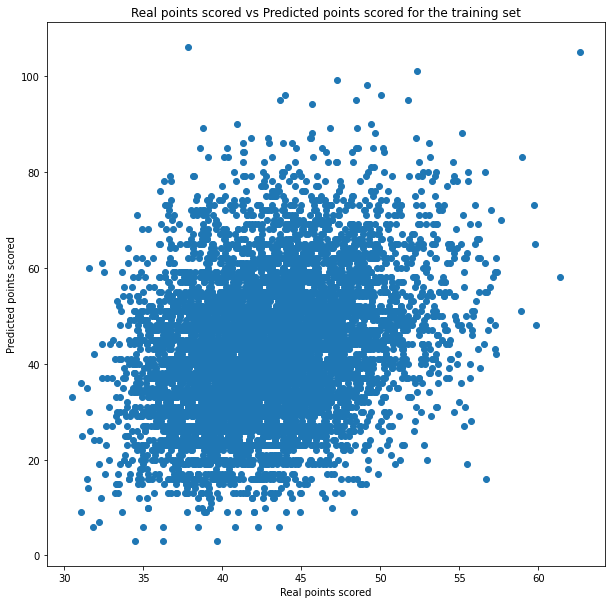

In [ ]:
pred_train = linear_reg.predict(X_train)
plt.figure(figsize=(10,10))
plt.scatter(pred_train, Y_train)
plt.xlabel("Real points scored")
plt.ylabel("Predicted points scored")
plt.title("Real points scored vs Predicted points scored for the training set")

Text(0.5, 1.0, 'Real points scored vs Predicted points scored for the test set')

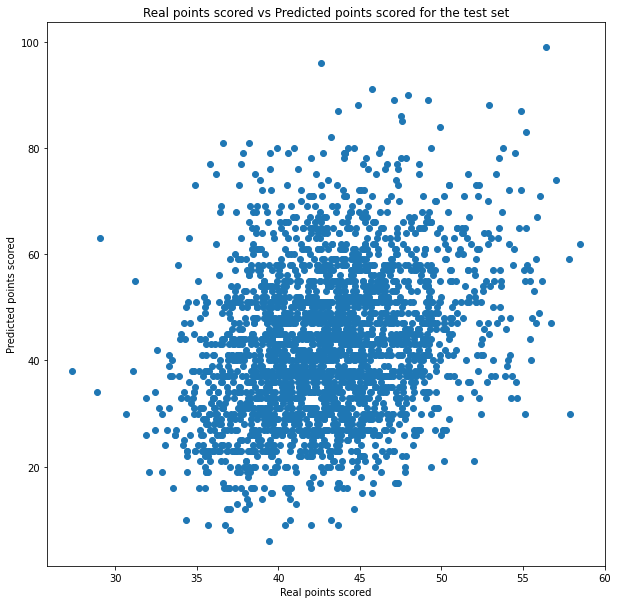

In [ ]:
pred_test = linear_reg.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(pred_test, Y_test)
plt.xlabel("Real points scored")
plt.ylabel("Predicted points scored")
plt.title("Real points scored vs Predicted points scored for the test set")

Now we will try to improve the linear regression model by using cross validation with a diferent train-test split

In [ ]:
from sklearn.model_selection import cross_val_score

linear_reg_cv = LinearRegression()
linear_reg_cv.fit(X_train, Y_train)
score = cross_val_score(linear_reg_cv, linear_reg_features, linear_reg_labels, cv=5)

linear_reg_cv_acc = np.mean(score)
print(f'Cross validation accuracy of {linear_reg_cv_acc}')

Cross validation accuracy of 0.07328120386572594


Text(0.5, 1.0, 'Real points scored vs Predicted points scored for the training set with CV')

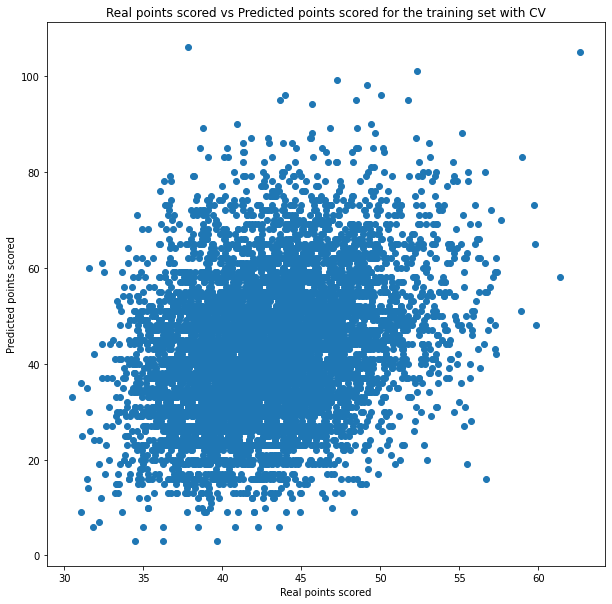

In [ ]:
pred_train_cv = linear_reg.predict(X_train)
plt.figure(figsize=(10,10))
plt.scatter(pred_train_cv, Y_train)
plt.xlabel("Real points scored")
plt.ylabel("Predicted points scored")
plt.title("Real points scored vs Predicted points scored for the training set with CV")

Text(0.5, 1.0, 'Real points scored vs Predicted points scored for the test set with CV')

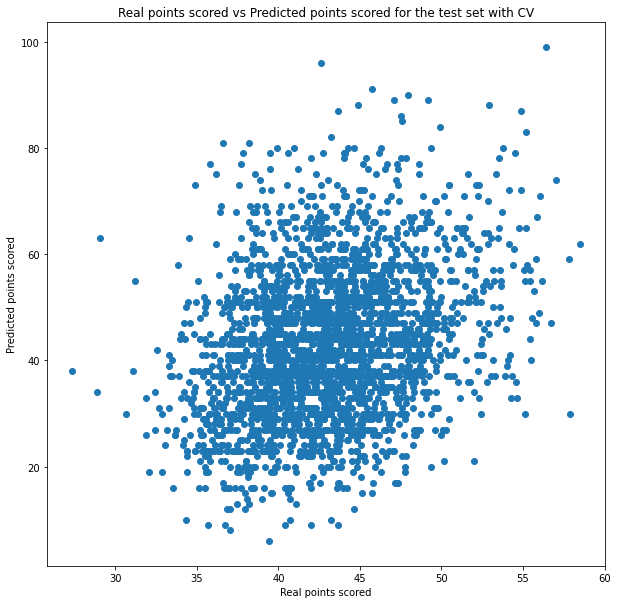

In [ ]:
pred_test_cv = linear_reg.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(pred_test_cv, Y_test)
plt.xlabel("Real points scored")
plt.ylabel("Predicted points scored")
plt.title("Real points scored vs Predicted points scored for the test set with CV")

Now we will try using different types of regularization to see if we can get an improved model. 

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

cross_val_scores_ridge = []

lambdas = []

for plambda in range(1,6):
    ridge_reg = Ridge(alpha=plambda*0.25)
    ridge_reg.fit(X_train, Y_train)
    scores = cross_val_score(ridge_reg, linear_reg_features, linear_reg_labels, cv=5)
    avg_cross_val_score = np.mean(scores)
    cross_val_scores_ridge.append(avg_cross_val_score)
    lambdas.append(plambda * 0.25)

for i, plambda in enumerate(lambdas):
    print(f"With lambda = {plambda} ->  score = {cross_val_scores_ridge[i]}")

highest_score_index = cross_val_scores_ridge.index(np.max(cross_val_scores_ridge))
best_lambda = lambdas[highest_score_index]
print(f'Lambda with best score is {best_lambda}')

ridge_reg = Ridge(alpha=best_lambda)
ridge_reg.fit(X_train, Y_train)

ridge_reg_train_acc = ridge_reg.score(X_train, Y_train)
ridge_reg_test_acc = ridge_reg.score(X_test, Y_test)

print(f"For Ridge regression with coefficients: {ridge_reg.coef_}")
print(f'train r^2 = {ridge_reg_train_acc}')
print(f'test r^2 = {ridge_reg_train_acc}')

With lambda = 0.25 ->  score = 0.07328126614748967
With lambda = 0.5 ->  score = 0.07328131417902708
With lambda = 0.75 ->  score = 0.07328134843670334
With lambda = 1.0 ->  score = 0.07328136938034702
With lambda = 1.25 ->  score = 0.07328137745390259
Lambda with best score is 1.25
For Ridge regression with coefficients: [ 0.01968405  0.90426181 -0.01821026  0.04008345  0.01275603  0.87463309
 -0.00637555  0.00391734 -0.17555454  0.01882804  2.94995798  2.73551199]
train r^2 = 0.09588010138627578
test r^2 = 0.09588010138627578


Text(0.5, 1.0, 'Real points scored vs Predicted points scored for the train set with Ridge Regression')

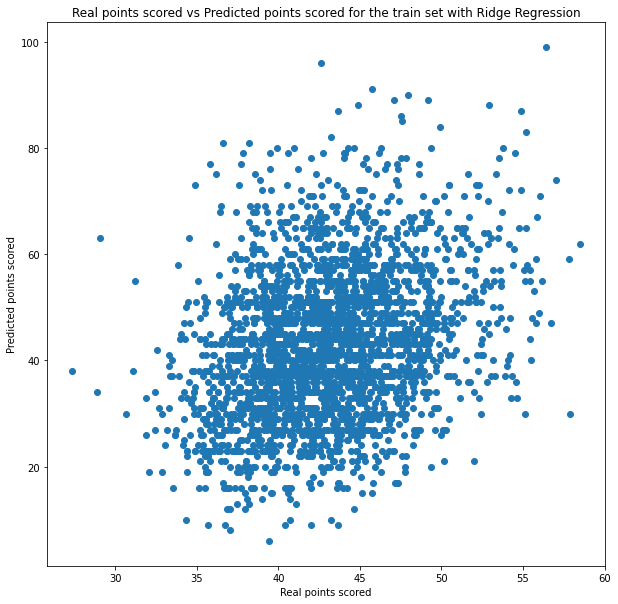

In [ ]:
pred_test_ridge_reg = ridge_reg.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(pred_test_cv, Y_test)
plt.xlabel("Real points scored")
plt.ylabel("Predicted points scored")
plt.title("Real points scored vs Predicted points scored for the train set with Ridge Regression")

Text(0.5, 1.0, 'Real points scored vs Predicted points scored for the test set with Ridge Regression')

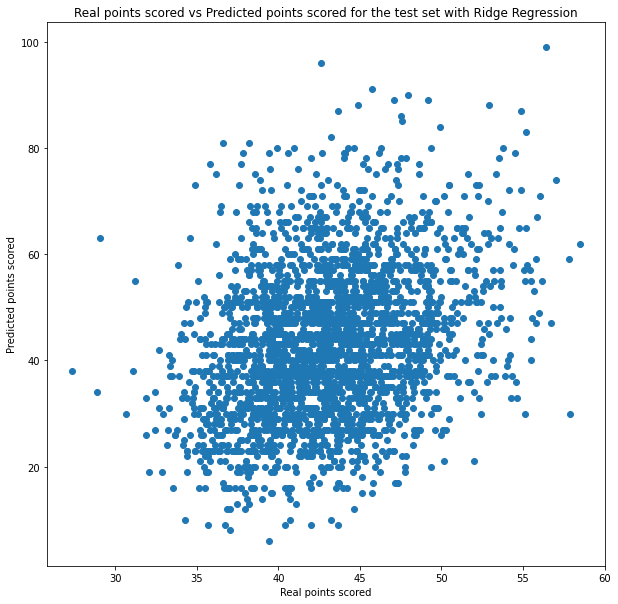

In [ ]:
pred_train_ridge_reg = ridge_reg.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(pred_test_ridge_reg, Y_test)
plt.xlabel("Real points scored")
plt.ylabel("Predicted points scored")
plt.title("Real points scored vs Predicted points scored for the test set with Ridge Regression")

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

cross_val_scores_lasso = []

lambdas = []

for plambda in range(1,6):
    lasso_reg = Lasso(alpha=plambda*0.25)
    lasso_reg.fit(X_train, Y_train)
    scores = cross_val_score(lasso_reg, linear_reg_features, linear_reg_labels, cv=5)
    avg_cross_val_score = np.mean(scores)
    cross_val_scores_lasso.append(avg_cross_val_score)
    lambdas.append(plambda * 0.25)

for i, plambda in enumerate(lambdas):
    print(f"With lambda = {plambda} ->  score = {cross_val_scores_lasso[i]}")

highest_score_index = cross_val_scores_lasso.index(np.max(cross_val_scores_lasso))
best_lambda = lambdas[highest_score_index]
print(f'Lambda with best score is {best_lambda}')

lasso_reg = Lasso(alpha=best_lambda)
lasso_reg.fit(X_train, Y_train)
lasso_reg_train_acc = lasso_reg.score(X_train, Y_train) 
lasso_reg_test_acc = lasso_reg.score(X_test, Y_test)
print(f"For Lasso regression with coefficients: {lasso_reg.coef_}")
print(f'train r^2 = {lasso_reg_train_acc}')
print(f'test r^2 = {lasso_reg_test_acc}')

With lambda = 0.25 ->  score = 0.07366459720863898
With lambda = 0.5 ->  score = 0.07368053497094726
With lambda = 0.75 ->  score = 0.07357894984424891
With lambda = 1.0 ->  score = 0.07343489877624658
With lambda = 1.25 ->  score = 0.07322545498462521
Lambda with best score is 0.5
For Lasso regression with coefficients: [ 0.01352481  0.         -0.01169362  0.03413655  0.          0.85252594
 -0.00297728  0.         -0.15060774  0.01321487  0.         -0.        ]
train r^2 = 0.09501396844972876
test r^2 = 0.09295073133838982


Text(0.5, 1.0, 'Real points scored vs Predicted points scored for the train set with Lasso Regression')

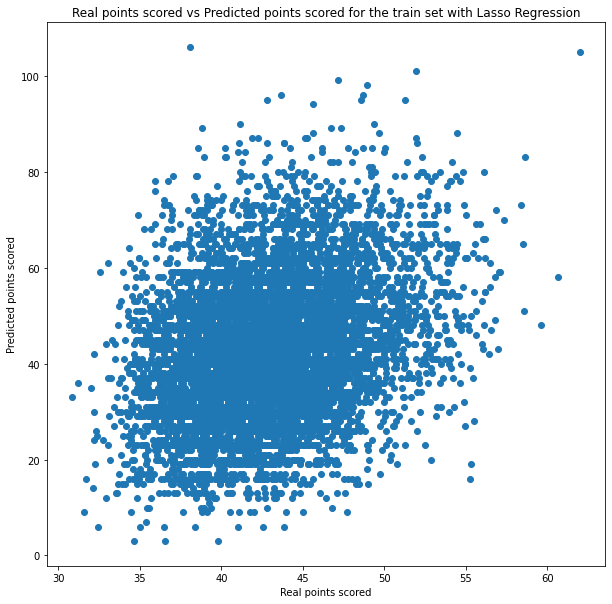

In [ ]:
pred_train_lasso_reg = lasso_reg.predict(X_train)
plt.figure(figsize=(10,10))
plt.scatter(pred_train_lasso_reg, Y_train)
plt.xlabel("Real points scored")
plt.ylabel("Predicted points scored")
plt.title("Real points scored vs Predicted points scored for the train set with Lasso Regression")

Text(0.5, 1.0, 'Real points scored vs Predicted points scored for the test set with Lasso Regression')

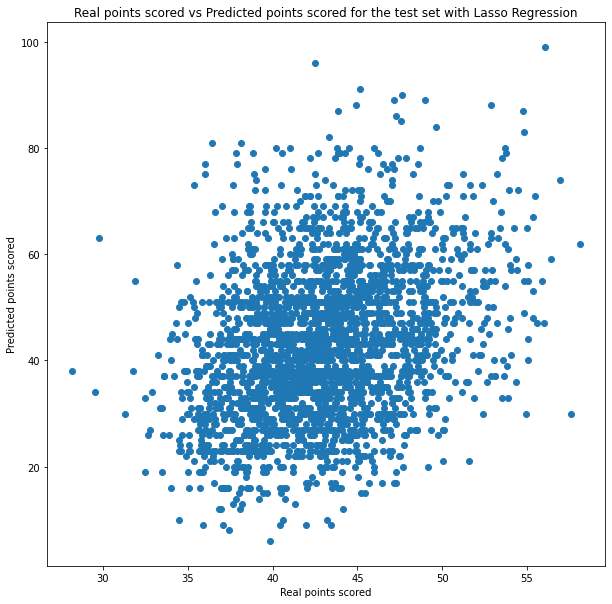

In [ ]:
pred_test_lasso_reg = lasso_reg.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(pred_test_lasso_reg, Y_test)
plt.xlabel("Real points scored")
plt.ylabel("Predicted points scored")
plt.title("Real points scored vs Predicted points scored for the test set with Lasso Regression")

### Elasticnet Regression

In [ ]:
from sklearn.linear_model import ElasticNetCV

elastic_net_reg = ElasticNetCV(cv=5, max_iter=3000)
elastic_net_reg.fit(X_train, Y_train)

elastic_net_reg_train_acc = elastic_net_reg.score(X_train, Y_train)
elastic_net_reg_test_acc = elastic_net_reg.score(X_test, Y_test)
print(f"For Elasticnet regression with coefficients: {elastic_net_reg.coef_}")
print(f'train r^2 = {elastic_net_reg_train_acc}')
print(f'test r^2 = {elastic_net_reg_test_acc}')

For Elasticnet regression with coefficients: [ 1.70740385e-02  0.00000000e+00 -1.39343753e-02  3.63886885e-02
 -0.00000000e+00  8.45937049e-01 -4.06913566e-03  4.39028995e-04
 -1.58739870e-01  1.41479041e-02  0.00000000e+00 -0.00000000e+00]
train r^2 = 0.09505551184839489
test r^2 = 0.09305484380183815


Text(0.5, 1.0, 'Real points scored vs Predicted points scored for the train set with Elasticnet Regression')

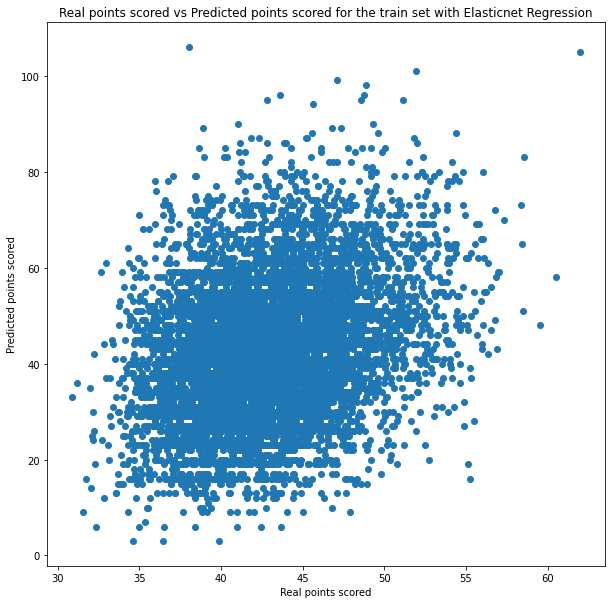

In [ ]:
pred_train_elastic_net_reg = elastic_net_reg.predict(X_train)
plt.figure(figsize=(10,10))
plt.scatter(pred_train_elastic_net_reg, Y_train)
plt.xlabel("Real points scored")
plt.ylabel("Predicted points scored")
plt.title("Real points scored vs Predicted points scored for the train set with Elasticnet Regression")

Text(0.5, 1.0, 'Real points scored vs Predicted points scored for the test set with Elasticnet Regression')

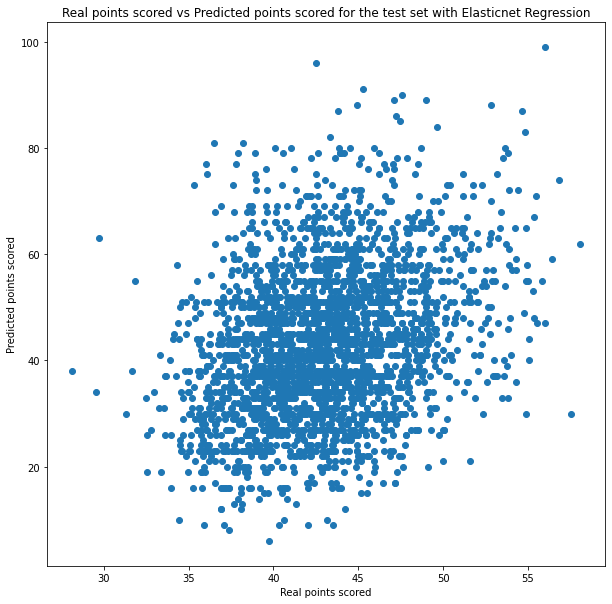

In [ ]:
pred_test_elastic_net_reg = elastic_net_reg.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(pred_test_elastic_net_reg, Y_test)
plt.xlabel("Real points scored")
plt.ylabel("Predicted points scored")
plt.title("Real points scored vs Predicted points scored for the test set with Elasticnet Regression")

## Conclusions

In [ ]:
import pprint

models = [
    {
        # Basic linear regression
        'name': 'Linear regression',
        'accuracy': np.mean(np.array([lin_reg_test_accuracy, lin_reg_train_accuracy])),
        'model_coefs': linear_reg.coef_
    },
    {
        # Linear regression with cross validation
        'name': 'Linear regression with 5-fold cross validation',
        'accuracy': linear_reg_cv_acc,
        'model_coefs': linear_reg_cv.coef_
    },
    {
        # Ridge regression
        'name': 'Ridge regression with 5-fold cross validation',
        'accuracy': np.mean(np.array([ridge_reg_train_acc, ridge_reg_test_acc])),
        'model_coefs': ridge_reg.coef_
    },
    {
        # Lasso regression
        'name': 'Lasso regression with 5-fold cross validation',
        'accuracy': np.mean(np.array([lasso_reg_test_acc, lasso_reg_train_acc])),
        'model_coefs': lasso_reg.coef_
    },
    {
        # Elasticnet regression
        'name': 'Elasticnet regression with 5-fold cross validation',
        'accuracy': np.mean(np.array([elastic_net_reg_test_acc, elastic_net_reg_train_acc])),
        'model_coefs': elastic_net_reg.coef_
    },
]

print('Models generated')
pprint.pprint(models)

top_model = { 'name': '', 'accuracy': 0, 'model_coefs': None }

for model in models:
    if model['accuracy'] > top_model['accuracy']:
        top_model = model

print('Selected model is:')
print(top_model)

Models generated
[{'accuracy': 0.09369959211999312,
  'model_coefs': array([ 0.01965015,  0.90848827, -0.01821677,  0.04008407,  0.01317935,
        0.87464801, -0.00637892,  0.00393163, -0.17555207,  0.0188337 ,
        3.02273287,  2.80788132]),
  'name': 'Linear regression'},
 {'accuracy': 0.07328120386572594,
  'model_coefs': array([ 0.01965015,  0.90848827, -0.01821677,  0.04008407,  0.01317935,
        0.87464801, -0.00637892,  0.00393163, -0.17555207,  0.0188337 ,
        3.02273287,  2.80788132]),
  'name': 'Linear regression with 5-fold cross validation'},
 {'accuracy': 0.09371903627263417,
  'model_coefs': array([ 0.01968405,  0.90426181, -0.01821026,  0.04008345,  0.01275603,
        0.87463309, -0.00637555,  0.00391734, -0.17555454,  0.01882804,
        2.94995798,  2.73551199]),
  'name': 'Ridge regression with 5-fold cross validation'},
 {'accuracy': 0.09398234989405929,
  'model_coefs': array([ 0.01352481,  0.        , -0.01169362,  0.03413655,  0.        ,
        0.852

In [ ]:
pd.DataFrame(list(zip(linear_reg_features.columns, top_model['model_coefs'])), columns = ['features', 'estimatedCoefficients'])


,features,estimatedCoefficients
0,schedule_season,0.017074
1,schedule_playoff,0.000000
2,team_home,-0.013934
3,team_away,0.036389
4,spread_favorite,-0.000000
5,over_under_line,0.845937
6,stadium,-0.004069
7,weather_temperature,0.000439
8,weather_wind_mph,-0.158740
9,weather_humidity,0.014148


We were not really able to find a linear regression model that gives a strong predictor of a game's total score. 

## Classification with Logistic Regression

Now we will attempt to predict whether the home team wins or not using the **did_home_team_win** column.

In [ ]:
spreads_and_scores_df

,schedule_season,schedule_week,schedule_playoff,team_home,team_away,spread_favorite,over_under_line,stadium,weather_temperature,weather_wind_mph,weather_humidity,team_favorite_away,team_favorite_home,total_score,did_home_team_win
0,0,1,0,0,0,-3.0,35.0,0,64.0,8.0,66.0,1,0,24.0,1
1,0,1,0,1,1,-1.0,34.0,1,72.0,9.0,81.0,1,0,29.0,0
2,0,1,0,2,2,-6.0,35.0,2,65.0,5.0,77.0,1,0,18.0,1
3,0,1,0,3,3,-3.0,42.0,3,82.0,10.0,58.0,0,1,41.0,0
4,0,1,0,4,4,-9.0,38.0,4,66.0,11.0,70.0,0,1,61.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,41,19,1,26,19,-4.0,48.5,51,35.0,0.0,43.0,0,1,35.0,0
10439,41,19,1,3,26,-2.5,54.0,3,35.0,6.0,54.0,0,1,78.0,1
10440,41,19,1,14,14,-3.0,48.0,48,50.0,11.0,69.0,0,1,57.0,0
10441,41,20,1,3,19,-7.0,54.5,3,41.0,4.0,41.0,0,1,51.0,0


In [ ]:
spreads_and_scores_df.corr()['did_home_team_win']

schedule_season       -0.022071
schedule_week          0.019666
schedule_playoff       0.033100
team_home             -0.036291
team_away             -0.014282
spread_favorite       -0.150465
over_under_line       -0.009092
stadium               -0.029014
weather_temperature   -0.024166
weather_wind_mph       0.032879
weather_humidity       0.021277
team_favorite_away    -0.286496
team_favorite_home     0.284901
total_score           -0.003384
did_home_team_win      1.000000
Name: did_home_team_win, dtype: float64

In [ ]:
log_reg_features = spreads_and_scores_df.drop(['total_score', 'did_home_team_win'], axis=1)
log_reg_features

,schedule_season,schedule_week,schedule_playoff,team_home,team_away,spread_favorite,over_under_line,stadium,weather_temperature,weather_wind_mph,weather_humidity,team_favorite_away,team_favorite_home
0,0,1,0,0,0,-3.0,35.0,0,64.0,8.0,66.0,1,0
1,0,1,0,1,1,-1.0,34.0,1,72.0,9.0,81.0,1,0
2,0,1,0,2,2,-6.0,35.0,2,65.0,5.0,77.0,1,0
3,0,1,0,3,3,-3.0,42.0,3,82.0,10.0,58.0,0,1
4,0,1,0,4,4,-9.0,38.0,4,66.0,11.0,70.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,41,19,1,26,19,-4.0,48.5,51,35.0,0.0,43.0,0,1
10439,41,19,1,3,26,-2.5,54.0,3,35.0,6.0,54.0,0,1
10440,41,19,1,14,14,-3.0,48.0,48,50.0,11.0,69.0,0,1
10441,41,20,1,3,19,-7.0,54.5,3,41.0,4.0,41.0,0,1


In [ ]:
log_reg_labels = spreads_and_scores_df['did_home_team_win']
log_reg_labels

0        1
1        0
2        1
3        0
4        0
        ..
10438    0
10439    1
10440    0
10441    0
10442    1
Name: did_home_team_win, Length: 10443, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    log_reg_features, log_reg_labels, test_size=0.25, random_state=4)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(7832, 13)
(2611, 13)
(7832,)
(2611,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_reg = LogisticRegression(solver="saga",max_iter=3000)
log_reg.fit(X_train, Y_train)


LogisticRegression(max_iter=3000, solver='saga')

In [ ]:
log_reg_predict_train = log_reg.predict(X_train)
log_reg_predict_train
log_reg_train_accuracy = metrics.accuracy_score(Y_train, log_reg_predict_train)
print(f"Accuracy on train dataset = {log_reg_train_accuracy}")

Accuracy on train dataset = 0.6621552604698672


In [ ]:

log_reg_predict_test = log_reg.predict(X_test)
log_reg_predict_test
log_reg_test_accuracy = metrics.accuracy_score(Y_test, log_reg_predict_test)
print(f"Accuracy on test dataset = {log_reg_test_accuracy}")

Accuracy on test dataset = 0.6353887399463807


Now, we look at a logistic regression model with cross validation. 

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
cv_log_reg = LogisticRegressionCV(solver="saga",max_iter=3000, cv=5)
cv_log_reg.fit(X_train, Y_train)


LogisticRegressionCV(cv=5, max_iter=3000, solver='saga')

In [ ]:
cv_log_reg_predict_train = cv_log_reg.predict(X_train)
cv_log_reg_train_acc = metrics.accuracy_score(Y_train, cv_log_reg_predict_train)
print(f"Accuracy on train dataset = {cv_log_reg_train_acc}")

Accuracy on train dataset = 0.6624106230847804


In [ ]:
cv_log_reg_predict_test = cv_log_reg.predict(X_test)
cv_log_reg_test_acc = metrics.accuracy_score(Y_test, cv_log_reg_predict_test)
print(f"Accuracy on test dataset = {cv_log_reg_test_acc}")

Accuracy on test dataset = 0.6353887399463807


Scikit learn's *Logistic Regression* by default used an L2 regularization, or a Ridge penalty. Now we will try using L1 (Lasso) and L1 & L2 (Elasticnet) regularizations to see if the model can be improved. 

### Lasso Regularization

In [ ]:
lasso_log_reg = LogisticRegressionCV(penalty="l1", solver="saga", max_iter=3000, cv=5)
lasso_log_reg.fit(X_train, Y_train)


LogisticRegressionCV(cv=5, max_iter=3000, penalty='l1', solver='saga')

In [ ]:
lasso_log_reg_predict_train = lasso_log_reg.predict(X_train)
lasso_log_reg_train_acc = metrics.accuracy_score(Y_train, lasso_log_reg_predict_train)
print(f"Accuracy on train dataset = {lasso_log_reg_train_acc}")
lasso_log_reg_predict_test = lasso_log_reg.predict(X_test)
lasso_log_reg_test_acc = metrics.accuracy_score(Y_test, lasso_log_reg_predict_test)
print(f"Accuracy on test dataset = {lasso_log_reg_test_acc}")

Accuracy on train dataset = 0.6625383043922369
Accuracy on test dataset = 0.6369207200306396


### Elasticnet Regularization

In [ ]:
elastic_net_log_reg = LogisticRegressionCV(penalty="elasticnet", solver="saga", max_iter=3000, cv=5, l1_ratios=[0.1, 0.15, 0.2, 0.25, 0.3])
elastic_net_log_reg.fit(X_train, Y_train)

LogisticRegressionCV(cv=5, l1_ratios=[0.1, 0.15, 0.2, 0.25, 0.3], max_iter=3000,
                     penalty='elasticnet', solver='saga')

In [ ]:
elastic_net_log_reg_predict_train = elastic_net_log_reg.predict(X_train)
elastic_net_log_reg_train_acc = metrics.accuracy_score(Y_train, elastic_net_log_reg_predict_train)
print(f"Accuracy on train dataset = {elastic_net_log_reg_train_acc}")
elastic_net_log_reg_predict_test = elastic_net_log_reg.predict(X_test)
elastic_net_log_reg_test_acc = metrics.accuracy_score(Y_test, elastic_net_log_reg_predict_test)
print(f"Accuracy on test dataset = {elastic_net_log_reg_test_acc}")

Accuracy on train dataset = 0.6626659856996936
Accuracy on test dataset = 0.6369207200306396


### Conclusions

In [ ]:
import pprint

models = [
    {
        # Basic logistic regression
        'name': 'Logistic regression',
        'accuracy': np.mean(np.array([log_reg_train_accuracy, log_reg_test_accuracy])),
        'model_coefs': log_reg.coef_
    },
    {
        # Logistic regression with cross validation, also Ridge regression in this case
        'name': 'Logistic regression with 5-fold cross validation',
        'accuracy': np.mean(np.array([cv_log_reg_train_acc, cv_log_reg_test_acc])),
        'model_coefs': log_reg.coef_
    },
    {
        # Lasso regression
        'name': 'Lasso logistic regression with 5-fold cross validation',
        'accuracy': np.mean(np.array([lasso_log_reg_test_acc, lasso_log_reg_train_acc])),
        'model_coefs': lasso_log_reg.coef_
    },
    {
        # Elasticnet regression
        'name': 'Elasticnet logistic regression with 5-fold cross validation',
        'accuracy': np.mean(np.array([elastic_net_log_reg_test_acc, elastic_net_log_reg_train_acc])),
        'model_coefs': elastic_net_log_reg.coef_
    },
]

print('Models generated')
pprint.pprint(models)

top_model = { 'name': '', 'accuracy': 0, 'model_coefs': None }

for model in models:
    if model['accuracy'] > top_model['accuracy']:
        top_model = model


Models generated
[{'accuracy': 0.6487720002081239,
  'model_coefs': array([[-1.97239050e-03,  3.14696865e-03,  1.12408777e-01,
        -3.76838703e-03, -9.31385382e-04, -5.93276334e-02,
        -1.88584407e-03, -6.34004597e-04, -1.05481138e-03,
         7.77944537e-03, -2.95189960e-04, -7.12493980e-01,
         5.16241860e-01]]),
  'name': 'Logistic regression'},
 {'accuracy': 0.6488996815155805,
  'model_coefs': array([[-1.97239050e-03,  3.14696865e-03,  1.12408777e-01,
        -3.76838703e-03, -9.31385382e-04, -5.93276334e-02,
        -1.88584407e-03, -6.34004597e-04, -1.05481138e-03,
         7.77944537e-03, -2.95189960e-04, -7.12493980e-01,
         5.16241860e-01]]),
  'name': 'Logistic regression with 5-fold cross validation'},
 {'accuracy': 0.6497295122114383,
  'model_coefs': array([[-1.97189645e-03,  2.88712115e-03,  1.02585269e-01,
        -3.83195228e-03, -9.98083670e-04, -5.96127587e-02,
        -2.94277362e-03, -6.27637226e-04, -1.16858596e-03,
         7.60351782e-03, -3.

In [ ]:
print('Selected model is:')
print(top_model)

Selected model is:
{'name': 'Elasticnet logistic regression with 5-fold cross validation', 'accuracy': 0.6497933528651666, 'model_coefs': array([[-2.02879289e-03,  2.89252663e-03,  9.05434488e-02,
        -3.85670948e-03, -1.00675191e-03, -5.93367369e-02,
        -3.19281835e-03, -6.35105936e-04, -1.21436656e-03,
         7.48992302e-03, -3.87284629e-04, -7.36133677e-01,
         4.89730870e-01]])}
